<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/1_Estrategias_de_b%C3%BAsqueda_desinformada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2020

Este material ha sido construido utilizando material del libro Artificial Intelligence: A modern approach.

<hr>

<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/problem_solving.gif" width="400px">

## Agenda:

<br>
<font size="4">
<ol>
<li>Definición / formulación de problemas</li>
<br>
<li>Búsqueda de soluciones</li>
<br>
<li>Estrategias de búsqueda desinformada</li>
<br>
<li>Conclusiones</li>
</ol>
</font>

<hr>

# 1. Definición / Formulación de problemas

<br>
De forma genérica, un problema se puede definir como los estados que puede tomar una realidad y las posibles acciones para alcanzar un estado objetivo. Una solución a dicho problema consiste entonces en encontrar una secuencia de estados y acciones que me lleven del estado inicial al estado objetivo.
<br>
<br>
Por ejemplo, el problema del viajero se puede apreciar en la siguiente figura:
<br>
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/rumanian_map.png" width="600px">
<br>

## 1.1. Terminología
- **Espacio del problema** - Es el ambiente en el cual la búsqueda toma lugar, esto es, el conjunto de estados y operadores que cambian dichos estados.
- **Estado** - Configuración en el espacio del problema en un instante de tiempo.
- **Instancia del problema** - Estado inicial + estado objetivo.
- **Profundidad del problema** - Menor camino requerido para resolver el problema, es decir, el menor conjunto de estados que conducen de un estado inicial a un estado objetivo.
- **Acción / Operador** - Modificar de un estado del espacio del problema, que conduce de un $estado(t)$ a un $estado (t+1)$.
- **Solución** - Secuencia de acciones u operaciones que conducen del estado inicial al estado objetivo.
- **Costo** - Métrica que permite definir un valor de calidad de la solución. A mayor costo, peor solución. Por ejemplo, el costo se puede asociar a la profundidad del problema.

Teniendo en cuenta el mapa anterior y la terminología presentada, supongamos que queremos ir de Arab a Bucharest. Entonces podríamos definir lo siguiente:

- **Estado inicial:** Arad
- **Estado objetivo:** Bucharest.
- **Espacio del problema**:
    - **Estados:** Las ciudades.
    - **Acciones / Operadores:** Conducir entre ciudades contiguas.
- **Solución:** Secuencia de ciudades que conducen de Arad a Bucharest, por ejemplo: $\left \{ Arad, Sibiu, Fagaras, Bucharest \right \}$
- **Costo:** La suma de distancias.

<hr>

## 1.2.  Tipos de problemas

Un problema puede ser:
<ul>
    <li><b><font color="green">Determinísta, totalmente observable: single-state problem</font></b> --- 
    Siempre se sabe en que estado se estará; la solución es una secuencia. Ejemplo: El problema del viajero</li>
    <br>
    <li><b><font color="green">No observable: problema de conformidad</font></b> --- Se puede no tener idea de donde se está; Si existe la solución, es una secuencia. Ejemplo: Robot de limpieza.</li>
    <br>
    <li><b><font color="green">No determinista y/o parcialmente observable: Problema de contingencia</font></b> --- Se puede no tener idea de donde se está; Si existe la solución, es una secuencia. Ejemplo: Navegación autónoma.</li>
</ul>
<br>
<font size="3" color="red"> Las estrategias que trataremos en este módulo, estarán orientadas a resolver problemas de tipo determinísta o single-state.</font>

<hr>

## 1.3. Formulación de un problema de tipo determinista

De manera formal, <font color="red">un problema se define mediante 4 elementos</font>:
<ul>
    <li><font color="blue"><b>Estado inicial</b></font>: Por ejemplo, "en Arad."</li>
    <br>
    <li><font color="blue"><b>Función de secuencia o sucesión</b> $$S(x)$$</font>: Retorna pares de acciones-estados a partir de un estado x.</li>
    <br>
    $$S(Arad)=\left \{ \left \langle Arad \rightarrow Zerind, Zerind \right \rangle,... \right \}$$
    <br>
    <li><font color="blue"><b>Objetivo:</b></font>, puede ser:
        <ul>
            <li><font color="green">Explícito</font>: Ejemplo, $$x = "Bucharest"$$</li>
            <br>
            <li><font color="green">Implícito</font>: Ejemplo, $$Limpio(x)$$</li>
        </ul>
    </li>
    <br>
    <li><font color="blue"><b>Costo de ruta(aditivo)</b></font>: Por ejemplo, la suma de las distancias o el número de acciones ejecutadas.</li>
    <br>
        <li>Una <font color="blue"><b>solución</b></font>: una secuencia que conduce del estado inicial al estado objetivo.</li>
</ul>

<hr>

## 1.4.  Espacio de estados

El espacio de estados se refiere a una abstracción que se hace del problema, en el cuál se omiten los detalles que no agregan mayor información al problema y se mantienen los detalles importantes.
<br>
<br>
<center><font size="4" color="red"><i>"El mundo real es absurdamente complejo! Siempre se requiere abstraer el problema para resolverlo."</i></font></center>
<br>
<br>
Por ejemplo, para el problema del viajero se podría considerar solo la distancia entre ciudades para encontrar la mejor solución. En un caso real, habría que considerar factores que van desde la calidad de las vías, hasta condiciones sociales.
<br>
<br>
<a href="http://edition.cnn.com/2015/10/05/americas/brazil-wrong-directions-death/index.html">Las abstracciones no siempre son adecuadas.</a>

<hr>

### Analicemos y trabajemos:
En un espacio de estados muy reducido,se desea que un robot limpie un cuarto. En el siguiente figura se ilustran los posibles estados.
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/vacuum_world.png">
<br>
Definamos el espacio de estados.
<br>
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/state_space.png">
<br>
<font color="red" size="4">
<b>Resolvamos:</b>
<ul>
<li>Estados?</li>
<li>Acciones?</li>
<li>Objetivo?</li>
<li>Costo de ruta?</li>
</ul>
</font>

<hr>

## 1.5. Problemas aplicados

Si bien la formulación de problemas de manera abstracta es útil para desarrollar soluciones generales, cuando se desea pasar a etapa de producción, es necesario considerar los factores reales que debe considerar el problema. Por ejemplo, una formulación real de un problema de navegación en carro dentro de una ciudad debería considerar lo siguiente:

- **Estados**: Cada estado incluye la ubicación: calle, carrera, circular, dirección de la vía, etc. y datos GPS.
- **Estado inicial**: Estado estimado a partir de la solicitud del usuario.
- **Acciones**:  Relacionadas con la navegación espacial: avanzar en metros, cruzar izq., cruzar der., tomar salida $i$, tomar retorno, etc.
- **Objetivo**: Estado estimado a partir de la solicitud del usuario.
- **Costo de ruta**: Función que tiene en cuenta variables de interés como distancia, tiempo, flujo vehícular, seguridad, número de semáforos, etc.

Algunas problemas reales que son extensiones del mapa de rumania son:
- Estimación de rutas de entrega de mensajería.
- Estimación de rutas de turismo.
- Navegación autónoma.
- Diseño de proteínas.

<hr>

# 2. Búsqueda de soluciones

El espacio de un problema single-state puede ser expresado como un árbol que representa un mapa de estados que se pueden derivar en secuencia. Encontrar una solución dentro de dicho espacio, consistiría entonces en realizar una búsqueda sobre dicho árbol hasta alcanzar un nodo que contenga un estado solución.

## Definiciones:
- **Búsqueda**: Una vez formulado el problema, este debe ser resuelto aplicando un algoritmo de búsqueda el cuál recibe como parámetro de entrada el estado inicial y el estado objetivo.
- **Nodos**: Corresponden a estados del espacio del problema.
- **Ramas**: Correponden a acciones u operadores del espacio del problema.
- **Expansión del árbol**: A partir del estado actual (**padre**), se debe expandir el nodo generando los posibles estados **hijos** del mismo. Esto se logra utilizando la función de sucesión.
- **Hojas**: Definen la **frontera** del problema y pueden ser estados objetivo o no. Las ramas corresponden a los estados presentes en un **lista abierta (OPEN_LIST)**, de estados para expandir.
- **Estrategia de búsqueda**: Todos los algoritmos de búsqueda comparten una estructura básica, como se puede observar en la función *Tree-Search*. Sin embargo, los cambios sútiles en cuanto a la forma de recorrer dicho árbol o determinar el próximo nodo a expandir, determina la estrategia de búsqueda.

<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/tree_search.png" width="700px">
<center><i>Funcion básica de búsqueda.</i></center>

- **Rutas cíclicas $\subset$ Rutas redundantes**: Es evidente a simple vista que un espacio de estados puede considerar caminos o rutas que se repiten. Por ejemplo, en la siguiente figura se observa que en la tercera expansión del árbol se vuelve a Arad. Esta situación podría generar un loop infinito en la búsqueda, lo que a su vez impediría encontrar la solución al problema.  Sin embargo, un análisis simple revela que, sabiendo que el costo de ruta siempre será aditivo y no negativo, una ruta cíclica nunca será mejor que la misma ruta sin dicho cíclo. Este tipo de ruta es un caso específico de una familia de rutas denominada rutas redundantes. 

<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/search_example1.png" width="700px">
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/search_example2.png" width="700px">
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/search_example3.png" width="700px">
<center>Ejemplo de búsqueda: Mapa de rumania</center>

<hr>

### Discusión en clase
- Que relación tiene el patrón de diseño estrategia con el método Tree-Search?
- Cómo podríamos utilizar este patrón para el propósito de este curso?

<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/Strategy_Pattern.jpg" width="500"></center>
<center>Tomado de wikipedia.</center>

<a href="https://sourcemaking.com/design_patterns/strategy/python/1">patrón de diseño (estrategia)</a>

<hr>

## 2.1. Búsqueda en árboles y gráfos (Análisis)

<br>
<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/tree_graph_search.png" width="700"></center>
<center>Tomado del libro: Artificial Intelligence - A Modern Approach</center>

<hr>

## 2.2. Infraestructura

La implementación de un árbol del espacio del problema, requiere la utilización de una estructura de datos general. sea $n$ una estructura de datos tal que:
<br>
- **n.estado**: Es una representación de una configuración física del mundo. Generalmente se representa con una estructura de datos.
- **nodo.padre**: El nodo a partir del cuál se generó este nodo.
- **nodo.accion**: La acción que fue aplicada al padre para generar este nodo.
- **nodo.costo_ruta**: El costo tradicionalmente denominado $g(nodo)$, desde el estado inicial al nodo actual.
<br>
<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/node_structure.png"></center>
<center>Tomado del libro: Artificial Intelligence - A Modern Approach</center>
<br>
- **Generación de hijos**: Una función que utiliza la función de sucesión para generar todos los hijos de un nodo $n$, inicializando algunos valores como el costo.
<br><br>
<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/child_function.png" width="600"></center>
<center>Tomado del libro: Artificial Intelligence - A Modern Approach</center>

<hr>

# 3. Estrategias de búsqueda no-informada

<br>
Esta familia de estrategias, utilizan solo la información que se dispone al momento de definir el problema.
<br>
<font color="blue">
<ul>
    <li>Breadth-first search</li>
    <li>Uniform-cost search</li>
    <li>Depth-first search</li>
    <li>Depth-limited search</li>
    <li>Iterative deepening search</li>
</ul>
</font>


<hr>

## 3.1. Breadth First Search (BFS)

<br>
Se expanden el árbol de forma horizontal, utilizando una lista FIFO, en la cual los nuevos estados van al final.
<br><br>
<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/bfs_pseudocode.png" width="600"></center>
<center>Tomado del libro: Artificial Intelligence - A Modern Approach</center>

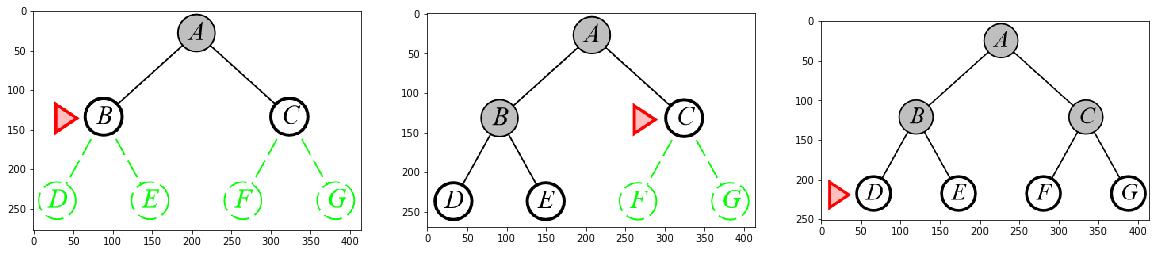

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage.io

fig, arreglo_plots = plt.subplots(1,3, figsize=(20, 10))
I1 = skimage.io.imread("res/bfs_1.png")
arreglo_plots[0].imshow(I1, cmap="gray")
I2 = skimage.io.imread("res/bfs_2.png")
arreglo_plots[1].imshow(I2, cmap="gray")
I3 = skimage.io.imread("res/bfs_3.png")
arreglo_plots[2].imshow(I3, cmap="gray")

In [ ]:
'''
Breadth-First Search.
Author: Pedro Atencio
Copyright 2020
'''

'''
TODO:
    1. Agregar el padre del nodo y una funcion para retornar la ruta hasta la raiz
    2. Implementar patron de estrategia
'''
class SimpleTree():

    def __init__(self,value):
     self.rootid = value
     self.value = value
     self.parent = None
     self.child = [] #lista simple: se puede convertir en un diccionario

    def addEdge(self, value):
        c = SimpleTree(value)
        c.parent = self
        self.child.append(c)

    def getEdge(self, child_index):
        return self.child[child_index]

def BFS(T, goal):
    q = []
    q.append(T)
    while(len(q) != 0):
        nodo = q.pop(0)#FIFO
        #nodo = q.pop()#LIFO
        print(nodo.value)
        if(nodo.value == goal):
            print("Se encontro el nodo objetivo")
            return nodo
            break
        n = len(nodo.child)
        for i in range(n):
            q.append(nodo.getEdge(i))

T = SimpleTree('A')
T.addEdge('F')
T.addEdge('C')

B = T.getEdge(0)
B.addEdge('D')
D = B.getEdge(0)
D.addEdge('G')
D.addEdge('H')
H = D.getEdge(1)
H.addEdge('F')

C = T.getEdge(1)
C.addEdge('E')
C.addEdge('F')

nodo_objetivo = BFS(T, 'F')    

A
F
Se encontro el nodo objetivo


In [ ]:
def get_solution(nodo):
  if(nodo == None):
    return
  else:
    print(nodo.value)
    get_solution(nodo.parent)

In [ ]:
get_solution(nodo_objetivo)

F
A


<hr>

## 3.2. Uniform Cost Search (UCS)

<br>
Equivalente a una búsqueda en anchura en la cuál, la lista es organizada en forma ascendente, tomando como valor, los costos de ir de un estado a otro. Para ello las transiciones entre estados deben estar valoradas. Por ejemplo, en el problema del viajero, el costo se puede asociar a la distancia.

<br><br>
<center><img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/UCS.jpeg" width="700"></center>
<center>Tomado del libro: Artificial Intelligence - A Modern Approach</center>

<hr>

### Trabajemos

<ul>
<li>Cual es la ruta que encuentra el algoritmo UCS para el siguiente árbol, siendo el estado objetivo G?</li>
<li>Es igual al resultado del algoritmo BFS?</li>
</ul>
<br>
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/ucs_example.png" width="300px">

<hr>

## 3.3. Depth First Search

Se expanden el árbol de forma vertical, utilizando una LIFO o pila, en la cual los nuevos estados se expanden de primero.

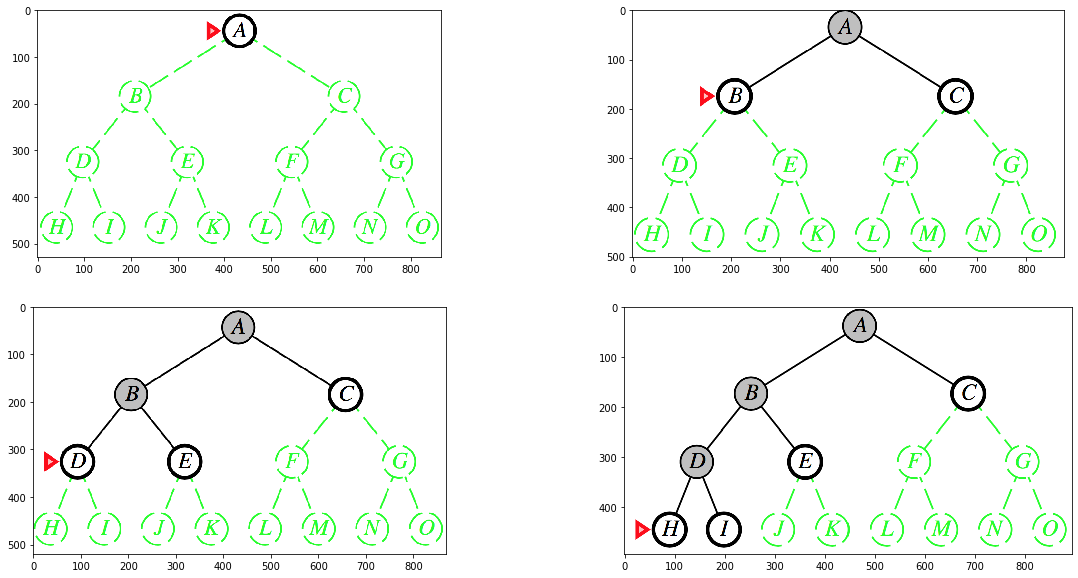

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage.io

fig, arreglo_plots = plt.subplots(2,2, figsize=(20, 10))
I1 = skimage.io.imread("res/dfs_1.png")
arreglo_plots[0,0].imshow(I1, cmap="gray")
I2 = skimage.io.imread("res/dfs_2.png")
arreglo_plots[0,1].imshow(I2, cmap="gray")
I3 = skimage.io.imread("res/dfs_3.png")
arreglo_plots[1,0].imshow(I3, cmap="gray")
I4 = skimage.io.imread("res/dfs_4.png")
arreglo_plots[1,1].imshow(I4, cmap="gray")

In [ ]:
'''
Depth-First Search.
Author: Pedro Atencio
Copyright 2020
'''

'''
TODO:
    1. Agregar el padre del nodo y una funcion para retornar la ruta hasta la raiz
    2. Implementar patron de estrategia
'''

class SimpleTree():

    def __init__(self,value):
     self.rootid = value
     self.value = value
     self.child = [] #lista simple: se puede convertir en un diccionario

    def addEdge(self, value):
        c = SimpleTree(value)
        self.child.append(c)

    def getEdge(self, child_index):
        return self.child[child_index]


def DFS(T, goal):
    stack = []
    stack.append(T)
    while(len(stack) != 0):
        nodo = stack.pop()
        print(nodo.value)
        if(nodo.value == goal):
            break
        n = len(nodo.child)
        for i in reversed(range(n)):
            stack.append(nodo.getEdge(i))


T = SimpleTree('A')
T.addEdge('B')
T.addEdge('C')

B = T.getEdge(0)
B.addEdge('D')
D = B.getEdge(0)
D.addEdge('G')
D.addEdge('H')

C = T.getEdge(1)
C.addEdge('E')
C.addEdge('F')

DFS(T, 'E')

A
B
D
G
H
C
E


<hr>

## 3.4. Depth-Limited Search (DLS)

Esta estrategia añade una restricción a la búsqueda DFS, que consiste en validar la profundad del nodo actual. Si dicha profundidad o altura es superior a una altura limite definida por el usuario, entonces se descarta el nodo actual.

In [ ]:
'''
Depth-Limited Search.
Author: Pedro Atencio
Copyright 2017
'''

'''
TODO:
    1. Agregar el padre del nodo y una funcion para retornar la ruta hasta la raiz
    2. Implementar patron de estrategia
'''

class SimpleTree():

    def __init__(self,value,parent=None):
        self.rootid = value
        self.value = value
        self.child = [] #lista simple: se puede convertir en un diccionario
        self.parent = parent
        if parent == None:
            self.h = 0
        else:
            self.h = parent.h + 1
    

    def addEdge(self, value):
        c = SimpleTree(value, self)
        self.child.append(c)

    def getEdge(self, child_index):
        return self.child[child_index]


def DLS(T, goal, l):
    stack = []
    stack.append(T)
    while(len(stack) != 0):
        nodo = stack.pop()
        if(nodo.h > l):
            continue
        print(nodo.value)
        if(nodo.value == goal):
            return nodo
            break
        n = len(nodo.child)
        for i in reversed(range(n)):
            stack.append(nodo.getEdge(i))


T = SimpleTree('A')
T.addEdge('B')
T.addEdge('C')

B = T.getEdge(0)
B.addEdge('D')
D = B.getEdge(0)
D.addEdge('G')
D.addEdge('E')

G = D.getEdge(0)
G.addEdge('E')

C = T.getEdge(1)
C.addEdge('K')
C.addEdge('F')

nodo = DLS(T, 'E', 4)
print("R: ",nodo.parent.value)

A
B
D
G
E
R:  G


<hr>

## 3.5. Iterative Deepening Search (IDS)

La estrategia DLS puede no encontrar una solución si la altura <font color="red">l</font> es inferior al nivel donde se encuentra el estado objeto. Una solución a este problema, consiste en iterar sobre el valor <font color="red">l</font> hasta que se encuentre el objetivo. De esta forma si la solución no se encuentra en <font color="red">l=1</font>, se procede a buscar en <font color="red">l=2</font>, hasta terminar.
<br>
<img src="https://raw.githubusercontent.com/psatencio/IA_ITM/2020_I/Presentaciones/1.%20Solving%20Problems%20by%20Searching/res/ids_algorithm.png" width="600px">

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage.io

fig, arreglo_plots = plt.subplots(3,1,figsize=(20, 25))
I1 = skimage.io.imread("res/ids_1.png")
arreglo_plots[0].imshow(I1, cmap="gray")
I2 = skimage.io.imread("res/ids_2.png")
arreglo_plots[1].imshow(I2, cmap="gray")
I3 = skimage.io.imread("res/ids_3.png")
arreglo_plots[2].imshow(I3, cmap="gray")



## Trabajemos
Implementar en clase el algoritmo IDS, utilizando como base la implementación de DLS.

<hr>

# 4. Nota finales

<hr>
<font size="4">
<ul>
    <li>La formulación de problemas requiere abstraer detalles del mundo real para poder definir espacios de estados que puedan ser tratables en tiempo computacionales factibles.</li>
    <br>
<li>Existen estrategias de búsqueda. Una de las más conocidas son las estrategias no informadas.</li>
<br>
<li>La búsqueda en forma de grafo, puede ser exponencialmente más eficiente que la búsqueda en árboles.</li>
<br>
    <li>Una visualización de los algoritmos de búsqueda puede encontrarse en 
<a href = "https://visualgo.net/en/dfsbfs">VisuAlgo</a>.</li>
</ul>
</font>